In [4]:
import scipy.io as loadmat
import numpy as np
import matplotlib.pyplot as plt


In [5]:

dataname = '_2023_12_01'

data = loadmat.loadmat('data/velocity_field_wo_removing_bubble'+dataname+'.mat')

type(data)

data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'dt', 'res', 'vel', 'xphy', 'yphy'])

In [6]:
# Extract the 'vel' variable from the loaded data
vel = data['vel']

# Check and print the structure of 'vel'
print("Type of vel:", type(vel))
print("Shape of vel:", np.shape(vel))

# If vel is a structured array, print the fields
if isinstance(vel, np.ndarray) and vel.dtype.names:
    print("Fields in vel:", vel.dtype.names)

# Print the first element to understand its structure
if len(vel) > 0:
    print("First element in vel:", vel[0])
    if isinstance(vel[0], np.ndarray) and vel[0].dtype.names:
        print("Fields in the first element of vel:", vel[0].dtype.names)

# Extract the 'vel' variable from the loaded data
vel = data['vel'][0]  # Assuming vel is a 1D array of structured elements

N = len(vel)

c_threshold = 0.7

u_list = []
v_list = []

for i in range(N):
    ui = vel[i]['u']
    vi = vel[i]['v']
    ci = vel[i]['c']

    # Check if ui, vi, and ci are not empty
    if ui.size > 0 and vi.size > 0 and ci.size > 0:
        # Remove all data with low correlation
        flag = ci < c_threshold
        ui[flag] = np.nan
        vi[flag] = np.nan

        u_list.append(ui)
        v_list.append(vi)

# Convert lists to three-dimensional arrays
u = np.dstack(u_list) if u_list else np.array([])
v = np.dstack(v_list) if v_list else np.array([])

Type of vel: <class 'numpy.ndarray'>
Shape of vel: (1, 1199)
Fields in vel: ('u', 'v', 'c')
First element in vel: [(array([[-1.34866411e-02, -1.39603321e-02, -1.31589279e-02, ...,
         -2.25832462e-03, -3.82480547e-03,  2.58214958e-04],
        [-3.54641935e-02, -3.44827428e-02, -2.38567247e-02, ...,
         -4.29238135e-03, -1.83295214e-03, -1.97463180e-03],
        [-3.60438761e-02, -3.57166883e-02, -2.70663641e-02, ...,
         -4.23495003e-03, -2.05544159e-03, -5.24784912e-03],
        ...,
        [ 6.11706273e-03,  6.95171009e-03,  4.61146396e-03, ...,
         -2.69910708e-03, -1.93931717e-03, -1.95107099e-03],
        [ 7.62977142e-03,  6.46586147e-03,  5.00262267e-03, ...,
         -9.55277622e-04,  3.01550712e-03, -1.87371583e-04],
        [ 9.12887894e-03,  6.68533079e-03,  4.11636256e-03, ...,
          6.45936451e-05,  2.66691386e-04,  9.11297821e-04]]), array([[-0.03383373, -0.03814112, -0.03952405, ..., -0.0362189 ,
         -0.03301147, -0.02726531],
        [-0.0

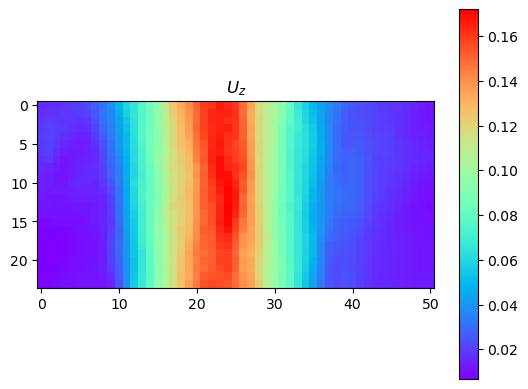

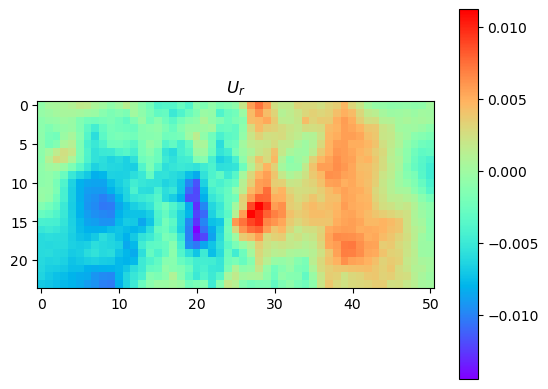

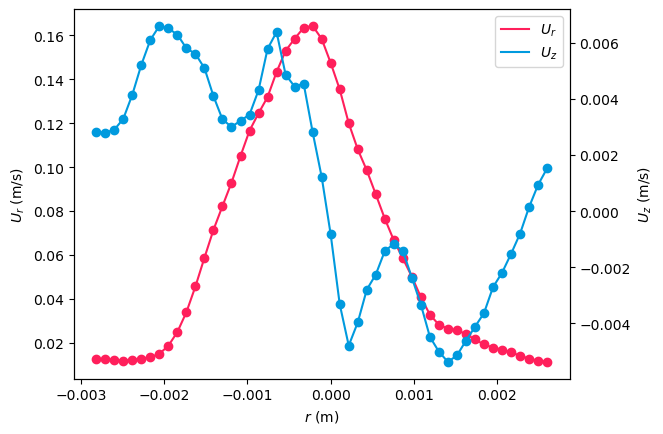

In [11]:
yphy = data['yphy'].reshape(-1)
xphy = data['xphy'].reshape(-1)

# Time average
if u.size > 0 and v.size > 0:
    um = np.nanmean(u, axis=2)
    vm = np.nanmean(v, axis=2)
    #print(um)

    # Plot vm
    plt.imshow(-vm,cmap='rainbow')
    plt.colorbar()
    plt.title("$U_z$")
   
    plt.savefig("figures/Vm"+dataname+".png")

    
    plt.show()

    # Plot vm
    plt.imshow(-um, cmap='rainbow')
    plt.colorbar()
    plt.title("$U_r$")
   
    plt.savefig("figures/Um"+dataname+".png")
    plt.show()

    plt.close()


    length = np.arange(-np.shape(vm)[1]//2, np.shape(vm)[1]//2, 1) * 1.083e-4

    # Plot the mean of vm and um
    plt.figure()

    # First line plot on the primary y-axis
    line1, = plt.plot(length, -np.nanmean(vm, axis=0),color='#ff1f5b', label='$U_r$')
    plt.scatter(length, -np.nanmean(vm, axis=0), color='#ff1f5b', marker='o')
    plt.ylabel('$U_r$ (m/s)')
    plt.xlabel('$r$ (m)')
    # plt.grid(True)

    # Second line plot on the secondary y-axis
    ax2 = plt.twinx()
    line2, = ax2.plot(length, np.nanmean(um, axis=0), color='#009ade', label='$U_z')
    plt.scatter(length, np.nanmean(um, axis=0), color='#009ade', marker='o')
    ax2.set_ylabel('$U_z$ (m/s)')

    # Create a single legend for both lines
    plt.legend([line1, line2], ['$U_r$', '$U_z$'])

    #plt.xlim(-0.004, 0.004)
    plt.savefig("figures/mean_vm_um_X_direction"+dataname+".png")

    plt.show()
    plt.close()

else:
    print("No valid data to process.")

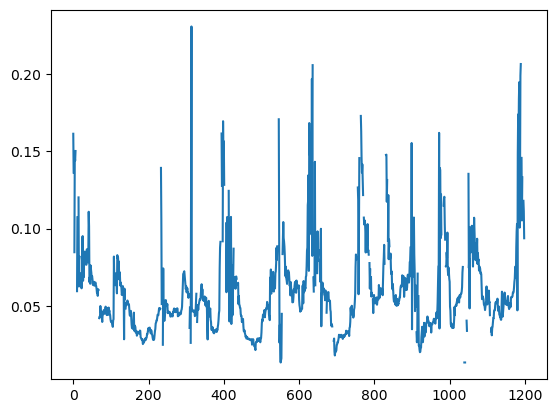

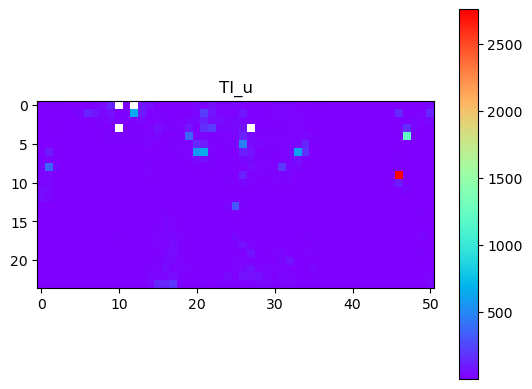

array([[ 0.00426601,  0.00339102,  0.00617314, ..., -0.01689277,
        -0.00565175,  0.00270632],
       [ 0.0059244 ,  0.00170551,  0.0036836 , ...,  0.0009348 ,
        -0.01101329, -0.00501486],
       [ 0.00204646,  0.00187387, -0.00020015, ..., -0.00112958,
        -0.01092723,         nan],
       ...,
       [ 0.0090018 ,  0.00914185,  0.00907605, ...,  0.00198251,
         0.00113633,  0.00091195],
       [ 0.00989779,  0.00752203,  0.01021984, ...,  0.00114122,
         0.0013617 ,  0.00138393],
       [ 0.01007796,  0.00944145,  0.0075291 , ...,  0.0011626 ,
        -0.00013461, -0.00022849]])

In [8]:
# Calculate the TKE

uinst = u + um[:, :, np.newaxis]
vinst = v + vm[:, :, np.newaxis]
TKE_u = np.power(uinst, 2)
TKE_v = np.power(vinst, 2)
TKE = 0.5 * (TKE_u + TKE_v + TKE_u)

x = TKE[10,25,:]
np.arange(len(x))
plt.plot(np.arange(len(x)),x)
plt.show()
plt.close()

# Calculate Turbulence Intensities

TI_u = np.sqrt(TKE_u) / np.abs(um[:, :, np.newaxis])

plt.imshow(TI_u[:,:,200],cmap='rainbow')
plt.colorbar()
plt.title("TI_u")
plt.show()

# Calculate the Reynolds stresses

ui